# Phish Setlist - MVP Modeling

The purpose of this notebook explore various deep learning model architectures to understand how hyperparameter choices affect prediction accuracy and loss.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import src

Using TensorFlow backend.


In [4]:
os.getcwd()

'/Users/anreed/Documents/My Stuff/TrAI/phish-setlist-modeling/notebooks'

In [5]:
mapping = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling2/seqlen-150/idx_to_song.pkl')

In [6]:
mapping

{0: '1999',
 1: '46 Days',
 2: '50 Ways to Leave Your Lover',
 3: '555',
 4: '5:15',
 5: '99 Problems',
 6: '<ENCORE2>',
 7: '<ENCORE>',
 8: '<SET1>',
 9: '<SET2>',
 10: '<SET3>',
 11: '<SET4>',
 12: 'A Apolitical Blues',
 13: 'A Day in the Life',
 14: 'A Life Beyond The Dream',
 15: 'A Song I Heard the Ocean Sing',
 16: 'AC/DC Bag',
 17: 'About to Run',
 18: 'Access Me',
 19: 'Acoustic Army',
 20: 'After Midnight',
 21: "Ain't Love Funny",
 22: 'Alaska',
 23: 'Albuquerque',
 24: 'All Along the Watchtower',
 25: 'All Blues',
 26: 'All Down the Line',
 27: 'All That You Dream',
 28: 'All Things Reconsidered',
 29: 'All of These Dreams',
 30: 'All the Pain Through the Years',
 31: 'Also Sprach Zarathustra',
 32: 'Alumni Blues',
 33: 'Alumni Blues Jam',
 34: 'Amazing Grace',
 35: 'Amazing Grace Jam',
 36: 'Ambient Jam',
 37: 'American Woman',
 38: 'Amidst the Peals of Laughter',
 39: 'Amoreena',
 40: 'Anarchy',
 41: 'Any Colour You Like',
 42: 'Anything But Me',
 43: 'Architect',
 44: 'Ar

In [7]:
len(mapping)

876

## Determine optimal learning rate

In [2]:
nn_arch_params = dict(seq_length=150,
                      num_classes=876,
                      lstm_units=100,
                      dropout_before=0.5,
                      dropout_after=0.5)

hist, lr_finder = src.model.train_model('nn_arch_2', 
                                        nn_arch_params, 
                                        epochs=3, 
                                        batch_size=128, 
                                        lr_finder=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 28552 samples, validate on 7138 samples
Epoch 1/3
28552/28552 [==============================] - 94s 3ms/step - loss: 5.4548 - acc: 0.0418 - val_loss: 5.1658 - val_acc: 0.0476

Epoch 00001: val_acc improved from -inf to 0.04763, saving model to ../models/mvp-setlist-modeling2/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout5.hdf5
Epoch 2/3
28552/28552 [==============================] - 96s 3ms/step - loss: 5.1270 - acc: 0.0742 - val_loss: 5.0792 - val_acc: 0.0932

Epoch 00002: val_acc improved from 0.04763 to 0.09316, saving model to ../models/mvp-setlist-modeling2/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout5.hdf5
Epoch 3/3
28552/28552 [==============================] - 105s 4ms/step - loss: 5.2393 - a

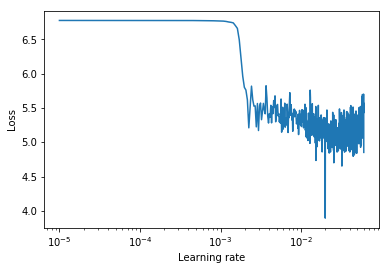

In [3]:
lr_finder.plot_loss()

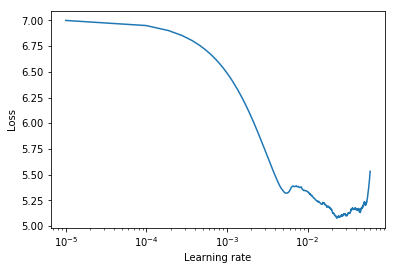

In [4]:
lr_finder.plot_loss_smooth()

## Grid Search Model Hyper Parameters

In [2]:
nn_arch_params = dict(seq_length=150, num_classes=876, lstm_units=100, dropout_before=0.5, dropout_after=0.5)

hist = src.model.train_model('nn_arch_2', nn_arch_params, epochs=50, batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 28552 samples, validate on 7138 samples
Epoch 1/50
28552/28552 [==============================] - 94s 3ms/step - loss: 5.3233 - acc: 0.0438 - val_loss: 5.1413 - val_acc: 0.0636

Epoch 00001: val_acc improved from -inf to 0.06360, saving model to ../models/mvp-setlist-modeling2/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout6.hdf5
Epoch 2/50
28552/28552 [==============================] - 99s 3ms/step - loss: 4.9753 - acc: 0.0889 - val_loss: 4.8414 - val_acc: 0.1157

Epoch 00002: val_acc improved from 0.06360 to 0.11572, saving model to ../models/mvp-setlist-modeling2/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout6.hdf5
Epoch 3/50
28552/28552 [==============================] - 103s 4ms/step - loss: 4.8256 

KeyboardInterrupt: 

In [16]:
hist.model.optimizer.lr

<tf.Tensor 'Adam/lr/read:0' shape=() dtype=float32>

In [17]:
import keras

In [ ]:
keras.optimizers.adam()

In [2]:
# Grid Search through parameters in Architecture #1

seq_lengths_list = [50, 150, 250]
lstm_units_list = [50, 100, 150]
dropout_before_list = [0.5, 0.75]
dropout_after_list = [0.5]

for seq_length in seq_lengths_list:
    for lstm_units in lstm_units_list:
        for dropout_before in dropout_before_list:
            for dropout_after in dropout_after_list:
                
                nn_arch_params = dict(seq_length=seq_length,
                                      num_classes=876,
                                      lstm_units=lstm_units,
                                      dropout_before=dropout_before,
                                      dropout_after=dropout_after)
                
                src.model.train_model(nn_arch_type='nn_arch_1',
                                      nn_arch_params=nn_arch_params,
                                      epochs=50,
                                      batch_size=128,
                                      lr_finder=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 31843 samples, validate on 3539 samples
Epoch 1/50
11648/31843 [=========>....................] - ETA: 7s - loss: 5.7660 - acc: 0.0395

KeyboardInterrupt: 

## Grid Search Round 2

In [3]:
# Grid Search through parameters in Architecture #2

seq_lengths_list = [150]
lstm_units_list = [100, 150]
dropout_before_list = [0.75]
dropout_after_list = [0.75]

for seq_length in seq_lengths_list:
    for lstm_units in lstm_units_list:
        for dropout_before in dropout_before_list:
            for dropout_after in dropout_after_list:
                
                nn_arch_params = dict(seq_length=seq_length,
                                      num_classes=870,
                                      lstm_units=lstm_units,
                                      dropout_before=dropout_before,
                                      dropout_after=dropout_after)
                
                src.model.train_model(nn_arch_type='nn_arch_2',
                                      nn_arch_params=nn_arch_params,
                                      epochs=50,
                                      batch_size=128,
                                      lr_finder=False)

Train on 31753 samples, validate on 3529 samples
Epoch 1/50
31753/31753 [==============================] - 47s 1ms/step - loss: 5.4858 - acc: 0.0372 - val_loss: 5.3445 - val_acc: 0.0419

Epoch 00001: val_acc improved from -inf to 0.04194, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 2/50
31753/31753 [==============================] - 47s 1ms/step - loss: 5.2626 - acc: 0.0388 - val_loss: 5.2293 - val_acc: 0.0425

Epoch 00002: val_acc improved from 0.04194 to 0.04250, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 3/50
31753/31753 [==============================] - 46s 1ms/step - loss: 5.1694 - acc: 0.0467 - val_loss: 5.0435 - val_acc: 0.0575

Epoch 00003: val_acc improved from 0.04250 to 0.05752, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 

31753/31753 [==============================] - 48s 1ms/step - loss: 4.0442 - acc: 0.1801 - val_loss: 4.0484 - val_acc: 0.2029

Epoch 00030: val_acc improved from 0.20204 to 0.20289, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 31/50
31753/31753 [==============================] - 46s 1ms/step - loss: 4.0364 - acc: 0.1790 - val_loss: 4.0387 - val_acc: 0.2054

Epoch 00031: val_acc improved from 0.20289 to 0.20544, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 32/50
31753/31753 [==============================] - 46s 1ms/step - loss: 4.0314 - acc: 0.1806 - val_loss: 4.0333 - val_acc: 0.2049

Epoch 00032: val_acc did not improve from 0.20544
Epoch 33/50
31753/31753 [==============================] - 46s 1ms/step - loss: 4.0249 - acc: 0.1800 - val_loss: 4.0311 - val_acc: 0.2049

Epoch 00033: val_acc did not improve from 0.20544


31753/31753 [==============================] - 65s 2ms/step - loss: 4.3363 - acc: 0.1593 - val_loss: 4.2674 - val_acc: 0.1771

Epoch 00011: val_acc improved from 0.17569 to 0.17710, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 12/50
31753/31753 [==============================] - 65s 2ms/step - loss: 4.2893 - acc: 0.1597 - val_loss: 4.2557 - val_acc: 0.1808

Epoch 00012: val_acc improved from 0.17710 to 0.18079, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 13/50
31753/31753 [==============================] - 64s 2ms/step - loss: 4.2587 - acc: 0.1635 - val_loss: 4.2128 - val_acc: 0.1839

Epoch 00013: val_acc improved from 0.18079 to 0.18390, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 14/50
31753/31753 [==============================] - 65

31753/31753 [==============================] - 66s 2ms/step - loss: 3.8426 - acc: 0.1944 - val_loss: 3.9598 - val_acc: 0.2159

Epoch 00043: val_acc improved from 0.21281 to 0.21593, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 44/50
31753/31753 [==============================] - 65s 2ms/step - loss: 3.8394 - acc: 0.1965 - val_loss: 3.9728 - val_acc: 0.2171

Epoch 00044: val_acc improved from 0.21593 to 0.21706, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 45/50
31753/31753 [==============================] - 65s 2ms/step - loss: 3.8389 - acc: 0.1922 - val_loss: 3.9625 - val_acc: 0.2131

Epoch 00045: val_acc did not improve from 0.21706
Epoch 46/50
31753/31753 [==============================] - 66s 2ms/step - loss: 3.8316 - acc: 0.1941 - val_loss: 3.9555 - val_acc: 0.2159

Epoch 00046: val_acc did not improve from 0.21706


### Targeted Models

It looks like a sequence length of 150 best fits the data. It also looks like more LSTM cells with high drop out has potential to learn more without overfitting if trained for more epochs (see models listed below)... Lets continue pursuing that idea.

- nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout-50epochs
- nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout-50epochs

In [2]:
# Grid Search through parameters in Architecture #2

seq_lengths_list = [150]
lstm_units_list = [100, 150, 200]
dropout_before_list = [0.75]
dropout_after_list = [0.75]

for seq_length in seq_lengths_list:
    for lstm_units in lstm_units_list:
        for dropout_before in dropout_before_list:
            for dropout_after in dropout_after_list:
                
                nn_arch_params = dict(seq_length=seq_length,
                                      num_classes=870,
                                      lstm_units=lstm_units,
                                      dropout_before=dropout_before,
                                      dropout_after=dropout_after)
                
                src.model.train_model(nn_arch_type='nn_arch_2',
                                      nn_arch_params=nn_arch_params,
                                      epochs=100,
                                      batch_size=128,
                                      lr_finder=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 31753 samples, validate on 3529 samples
Epoch 1/100
31753/31753 [==============================] - 43s 1ms/step - loss: 5.4854 - acc: 0.0390 - val_loss: 5.3284 - val_acc: 0.0351

Epoch 00001: val_acc improved from -inf to 0.03514, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 2/100
31753/31753 [==============================] - 46s 1ms/step - loss: 5.2651 - acc: 0.0413 - val_loss: 5.2187 - val_acc: 0.0476

Epoch 00002: val_acc improved from 0.03514 to 0.04761, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 3/100
31753/31753 [==============================] - 46s 1ms/step - loss: 5.179

31753/31753 [==============================] - 50s 2ms/step - loss: 4.0543 - acc: 0.1807 - val_loss: 4.0672 - val_acc: 0.1955

Epoch 00026: val_acc improved from 0.19524 to 0.19552, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 27/100
31753/31753 [==============================] - 50s 2ms/step - loss: 4.0413 - acc: 0.1812 - val_loss: 4.0552 - val_acc: 0.2015

Epoch 00027: val_acc improved from 0.19552 to 0.20147, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 28/100
31753/31753 [==============================] - 49s 2ms/step - loss: 4.0280 - acc: 0.1822 - val_loss: 4.0492 - val_acc: 0.1984

Epoch 00028: val_acc did not improve from 0.20147
Epoch 29/100
31753/31753 [==============================] - 46s 1ms/step - loss: 4.0266 - acc: 0.1828 - val_loss: 4.0435 - val_acc: 0.2020

Epoch 00029: val_acc improved from 0.20147 to 0

31753/31753 [==============================] - 45s 1ms/step - loss: 3.7622 - acc: 0.2043 - val_loss: 3.9110 - val_acc: 0.2253

Epoch 00100: val_acc improved from 0.22499 to 0.22528, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Train on 31753 samples, validate on 3529 samples
Epoch 1/100
31753/31753 [==============================] - 62s 2ms/step - loss: 5.4646 - acc: 0.0371 - val_loss: 5.3297 - val_acc: 0.0419

Epoch 00001: val_acc improved from -inf to 0.04194, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 2/100
31753/31753 [==============================] - 61s 2ms/step - loss: 5.2731 - acc: 0.0407 - val_loss: 5.2859 - val_acc: 0.0533

Epoch 00002: val_acc improved from 0.04194 to 0.05327, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-150-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 3/100
317

31753/31753 [==============================] - 65s 2ms/step - loss: 3.7184 - acc: 0.2061 - val_loss: 3.9176 - val_acc: 0.2190

Epoch 00068: val_acc did not improve from 0.22131
Epoch 69/100
31753/31753 [==============================] - 65s 2ms/step - loss: 3.7136 - acc: 0.2051 - val_loss: 3.9109 - val_acc: 0.2210

Epoch 00069: val_acc did not improve from 0.22131
Epoch 70/100
31753/31753 [==============================] - 65s 2ms/step - loss: 3.7155 - acc: 0.2063 - val_loss: 3.9664 - val_acc: 0.2190

Epoch 00070: val_acc did not improve from 0.22131
Epoch 71/100
31753/31753 [==============================] - 69s 2ms/step - loss: 3.7123 - acc: 0.2034 - val_loss: 3.9204 - val_acc: 0.2185

Epoch 00071: val_acc did not improve from 0.22131
Epoch 72/100
31753/31753 [==============================] - 65s 2ms/step - loss: 3.7049 - acc: 0.2065 - val_loss: 3.9148 - val_acc: 0.2148

Epoch 00072: val_acc did not improve from 0.22131
Epoch 73/100
31753/31753 [==============================] - 66s

31753/31753 [==============================] - 84s 3ms/step - loss: 3.7833 - acc: 0.2014 - val_loss: 3.9387 - val_acc: 0.2165

Epoch 00036: val_acc did not improve from 0.21791
Epoch 37/100
31753/31753 [==============================] - 83s 3ms/step - loss: 3.7753 - acc: 0.2007 - val_loss: 3.9303 - val_acc: 0.2120

Epoch 00037: val_acc did not improve from 0.21791
Epoch 38/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.7644 - acc: 0.2037 - val_loss: 3.9329 - val_acc: 0.2182

Epoch 00038: val_acc improved from 0.21791 to 0.21819, saving model to ../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-200-lstmunits-0.75-b_dropout-0.75-a_dropout.hdf5
Epoch 39/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.7639 - acc: 0.1996 - val_loss: 3.9482 - val_acc: 0.2131

Epoch 00039: val_acc did not improve from 0.21819
Epoch 40/100
31753/31753 [==============================] - 83s 3ms/step - loss: 3.7534 - acc: 0.2027 - val_loss: 3.9263 - va

31753/31753 [==============================] - 84s 3ms/step - loss: 3.6171 - acc: 0.2136 - val_loss: 3.9295 - val_acc: 0.2179

Epoch 00076: val_acc did not improve from 0.22329
Epoch 77/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.6111 - acc: 0.2143 - val_loss: 3.9262 - val_acc: 0.2227

Epoch 00077: val_acc did not improve from 0.22329
Epoch 78/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.6111 - acc: 0.2128 - val_loss: 3.9155 - val_acc: 0.2196

Epoch 00078: val_acc did not improve from 0.22329
Epoch 79/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.6008 - acc: 0.2153 - val_loss: 3.9230 - val_acc: 0.2210

Epoch 00079: val_acc did not improve from 0.22329
Epoch 80/100
31753/31753 [==============================] - 84s 3ms/step - loss: 3.5954 - acc: 0.2136 - val_loss: 3.9271 - val_acc: 0.2173

Epoch 00080: val_acc did not improve from 0.22329
Epoch 81/100
31753/31753 [==============================] - 84s

### Third Architecture

Lets see if introducing a 2nd LSTM layer can increase our learning ceiling...

In [2]:
# Grid Search through parameters in Architecture #3

seq_lengths_list = [150]
lstm_units_list = [100, 150]
dropout_before_list = [0.5, 0.75]
dropout_after_list = [0.5, 0.75]

for seq_length in seq_lengths_list:
    for lstm_units in lstm_units_list:
        for dropout_before in dropout_before_list:
            for dropout_after in dropout_after_list:
                
                nn_arch_params = dict(seq_length=seq_length,
                                      num_classes=870,
                                      lstm_units=lstm_units,
                                      dropout_before=dropout_before,
                                      dropout_after=dropout_after)
                
                src.model.train_model(nn_arch_type='nn_arch_3',
                                      nn_arch_params=nn_arch_params,
                                      epochs=75,
                                      batch_size=128,
                                      lr_finder=False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 31753 samples, validate on 3529 samples
Epoch 1/75
31753/31753 [==============================] - 91s 3ms/step - loss: 5.4448 - acc: 0.0391 - val_loss: 5.3118 - val_acc: 0.0490

Epoch 00001: val_acc improved from -inf to 0.04902, saving model to ../models/mvp-setlist-modeling/model.nn_arch_3-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout.hdf5
Epoch 2/75
31753/31753 [==============================] - 91s 3ms/step - loss: 5.2407 - acc: 0.0399 - val_loss: 5.1624 - val_acc: 0.0462

Epoch 00002: val_acc did not improve from 0.04902
Epoch 3/75
31753/31753 [==============================] - 94s 3ms/step - loss: 5.1185 - acc: 0.0488 - val_loss: 5.0586 - val_acc: 0.0657

Epoch 00003: val_acc improved from 0.04902 to 0.06574, saving model to ../model

31753/31753 [==============================] - 92s 3ms/step - loss: 3.5588 - acc: 0.2211 - val_loss: 3.9274 - val_acc: 0.2207

Epoch 00062: val_acc did not improve from 0.22471
Epoch 63/75
31753/31753 [==============================] - 90s 3ms/step - loss: 3.5597 - acc: 0.2205 - val_loss: 3.9429 - val_acc: 0.2241

Epoch 00063: val_acc did not improve from 0.22471
Epoch 64/75
31753/31753 [==============================] - 90s 3ms/step - loss: 3.5533 - acc: 0.2218 - val_loss: 3.9368 - val_acc: 0.2205

Epoch 00064: val_acc did not improve from 0.22471
Epoch 65/75
31753/31753 [==============================] - 90s 3ms/step - loss: 3.5418 - acc: 0.2213 - val_loss: 3.9214 - val_acc: 0.2236

Epoch 00065: val_acc did not improve from 0.22471
Epoch 66/75
31753/31753 [==============================] - 89s 3ms/step - loss: 3.5359 - acc: 0.2218 - val_loss: 3.9417 - val_acc: 0.2230

Epoch 00066: val_acc did not improve from 0.22471
Epoch 67/75
31753/31753 [==============================] - 92s 3ms/

31753/31753 [==============================] - 92s 3ms/step - loss: 4.1969 - acc: 0.1717 - val_loss: 4.1769 - val_acc: 0.1887

Epoch 00019: val_acc did not improve from 0.18872
Epoch 20/75
31753/31753 [==============================] - 91s 3ms/step - loss: 4.1796 - acc: 0.1740 - val_loss: 4.1718 - val_acc: 0.1884

Epoch 00020: val_acc did not improve from 0.18872
Epoch 21/75
31753/31753 [==============================] - 92s 3ms/step - loss: 4.1624 - acc: 0.1728 - val_loss: 4.1661 - val_acc: 0.1899

Epoch 00021: val_acc improved from 0.18872 to 0.18986, saving model to ../models/mvp-setlist-modeling/model.nn_arch_3-150-seqlen-100-lstmunits-0.5-b_dropout-0.75-a_dropout.hdf5
Epoch 22/75
31753/31753 [==============================] - 93s 3ms/step - loss: 4.1444 - acc: 0.1740 - val_loss: 4.1439 - val_acc: 0.1941

Epoch 00022: val_acc improved from 0.18986 to 0.19411, saving model to ../models/mvp-setlist-modeling/model.nn_arch_3-150-seqlen-100-lstmunits-0.5-b_dropout-0.75-a_dropout.hdf5
Ep

31753/31753 [==============================] - 92s 3ms/step - loss: 3.8531 - acc: 0.1998 - val_loss: 3.9642 - val_acc: 0.2173

Epoch 00053: val_acc improved from 0.21536 to 0.21734, saving model to ../models/mvp-setlist-modeling/model.nn_arch_3-150-seqlen-100-lstmunits-0.5-b_dropout-0.75-a_dropout.hdf5
Epoch 54/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.8479 - acc: 0.1969 - val_loss: 3.9690 - val_acc: 0.2165

Epoch 00054: val_acc did not improve from 0.21734
Epoch 55/75
31753/31753 [==============================] - 92s 3ms/step - loss: 3.8382 - acc: 0.1984 - val_loss: 3.9630 - val_acc: 0.2154

Epoch 00055: val_acc did not improve from 0.21734
Epoch 56/75
31753/31753 [==============================] - 92s 3ms/step - loss: 3.8388 - acc: 0.1982 - val_loss: 3.9608 - val_acc: 0.2151

Epoch 00056: val_acc did not improve from 0.21734
Epoch 57/75
31753/31753 [==============================] - 94s 3ms/step - loss: 3.8297 - acc: 0.1988 - val_loss: 3.9513 - val_acc

31753/31753 [==============================] - 93s 3ms/step - loss: 3.7134 - acc: 0.2043 - val_loss: 3.9581 - val_acc: 0.2125

Epoch 00044: val_acc did not improve from 0.21479
Epoch 45/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.7077 - acc: 0.2034 - val_loss: 3.9697 - val_acc: 0.2120

Epoch 00045: val_acc did not improve from 0.21479
Epoch 46/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.7059 - acc: 0.2036 - val_loss: 3.9598 - val_acc: 0.2125

Epoch 00046: val_acc did not improve from 0.21479
Epoch 47/75
31753/31753 [==============================] - 94s 3ms/step - loss: 3.6932 - acc: 0.2040 - val_loss: 3.9615 - val_acc: 0.2168

Epoch 00047: val_acc improved from 0.21479 to 0.21678, saving model to ../models/mvp-setlist-modeling/model.nn_arch_3-150-seqlen-100-lstmunits-0.75-b_dropout-0.5-a_dropout.hdf5
Epoch 48/75
31753/31753 [==============================] - 94s 3ms/step - loss: 3.6886 - acc: 0.2041 - val_loss: 3.9490 - val_acc


Epoch 00037: val_acc did not improve from 0.20657
Epoch 38/75
31753/31753 [==============================] - 95s 3ms/step - loss: 3.9684 - acc: 0.1872 - val_loss: 4.0009 - val_acc: 0.2060

Epoch 00038: val_acc did not improve from 0.20657
Epoch 39/75
31753/31753 [==============================] - 97s 3ms/step - loss: 3.9652 - acc: 0.1840 - val_loss: 4.0088 - val_acc: 0.2029

Epoch 00039: val_acc did not improve from 0.20657
Epoch 40/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.9526 - acc: 0.1858 - val_loss: 4.0048 - val_acc: 0.2063

Epoch 00040: val_acc did not improve from 0.20657
Epoch 41/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.9444 - acc: 0.1871 - val_loss: 3.9914 - val_acc: 0.2029

Epoch 00041: val_acc did not improve from 0.20657
Epoch 42/75
31753/31753 [==============================] - 93s 3ms/step - loss: 3.9333 - acc: 0.1906 - val_loss: 3.9916 - val_acc: 0.2057

Epoch 00042: val_acc did not improve from 0.20657
Epoc

31753/31753 [==============================] - 146s 5ms/step - loss: 3.6553 - acc: 0.2141 - val_loss: 3.9329 - val_acc: 0.2142

Epoch 00029: val_acc did not improve from 0.22131
Epoch 30/75
31753/31753 [==============================] - 147s 5ms/step - loss: 3.6413 - acc: 0.2137 - val_loss: 3.9265 - val_acc: 0.2117

Epoch 00030: val_acc did not improve from 0.22131
Epoch 31/75
31753/31753 [==============================] - 146s 5ms/step - loss: 3.6242 - acc: 0.2167 - val_loss: 3.9238 - val_acc: 0.2162

Epoch 00031: val_acc did not improve from 0.22131
Epoch 32/75
31753/31753 [==============================] - 146s 5ms/step - loss: 3.6094 - acc: 0.2171 - val_loss: 3.9362 - val_acc: 0.2154

Epoch 00032: val_acc did not improve from 0.22131
Epoch 33/75
31753/31753 [==============================] - 145s 5ms/step - loss: 3.6015 - acc: 0.2182 - val_loss: 3.9341 - val_acc: 0.2179

Epoch 00033: val_acc did not improve from 0.22131
Epoch 34/75
31753/31753 [==============================] - 146

31753/31753 [==============================] - 146s 5ms/step - loss: 3.2584 - acc: 0.2476 - val_loss: 4.0409 - val_acc: 0.2179

Epoch 00071: val_acc did not improve from 0.23038
Epoch 72/75
31753/31753 [==============================] - 146s 5ms/step - loss: 3.2455 - acc: 0.2509 - val_loss: 4.0432 - val_acc: 0.2216

Epoch 00072: val_acc did not improve from 0.23038
Epoch 73/75
31753/31753 [==============================] - 146s 5ms/step - loss: 3.2400 - acc: 0.2517 - val_loss: 4.0436 - val_acc: 0.2205

Epoch 00073: val_acc did not improve from 0.23038
Epoch 74/75
31753/31753 [==============================] - 147s 5ms/step - loss: 3.2319 - acc: 0.2508 - val_loss: 4.0598 - val_acc: 0.2210

Epoch 00074: val_acc did not improve from 0.23038
Epoch 75/75
31753/31753 [==============================] - 147s 5ms/step - loss: 3.2208 - acc: 0.2552 - val_loss: 4.0515 - val_acc: 0.2188

Epoch 00075: val_acc did not improve from 0.23038
Train on 31753 samples, validate on 3529 samples
Epoch 1/75
31

KeyboardInterrupt: 

## Generate Setlists

#### Load Model and Mapping

In [1]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

model = load_model('../models/initial-setlist-modeling/initial-setlist-model.h5')
mapping = src.util.load_pickle_object('../models/initial-setlist-modeling/initial-setlist-model-mapping.pickle')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


NameError: name 'src' is not defined

In [6]:
# create flip mapping to get song from encoding
reverse_mapping = {v:k for k,v in mapping.items()}

In [33]:
X_train[-1]

array([366, 129,   7, 230,   8, 533, 473, 473, 366, 280, 432,  93, 570,
       282, 576,   9, 276, 707, 585, 424, 121, 256, 124,   7, 292,   8,
       557, 731, 554, 101, 800, 315,  59, 855, 657,   9, 126, 790, 527,
       822, 861,   7, 274,   8, 850, 594, 480, 260, 232, 181, 843,   9,
       196, 298, 647, 307,  72, 307,  29, 451, 320, 817,   7, 746,   8,
       538, 545,  21, 119, 733, 674, 366,   9, 202, 158, 185, 535, 419,
         7, 201, 721, 582,   8, 232, 276, 152,  76, 845, 576, 272,  79,
         9, 527, 727, 779, 366, 825, 129,   7, 533])

In [ ]:
yhat = model.predict_classes()

In [18]:
reverse_mapping[129]

'Character Zero'

In [54]:
np.fromiter(reverse_mapping.keys(), dtype=int)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [43]:
# the final sequence
sequences_array[-1]

array([256, 843, 569, 124,   8, 731, 666,   3, 585, 386, 659, 126, 822,
       529, 810,  44, 576,   9, 196, 222, 604, 790, 292, 517, 292,  10,
       443,  45, 591, 619, 589, 401, 561, 674,   7, 727, 129,   8, 649,
       790, 247, 833, 218, 814, 556, 256, 585,   9, 637, 642, 319, 171,
        29,  57, 746,   7, 810,  92,   8, 861, 785,   1, 492, 210, 779,
       607, 589,   9, 602, 443, 624, 533, 586, 807,   7, 464,   8, 708,
       538,  83, 174, 465, 181, 659, 126,   9, 232, 451, 817, 255, 786,
       119, 259, 591,   7, 619, 431, 382,  67, 627, 787])

In [52]:
len(sequences_array[-1][1:])

100

In [51]:
len(X_train[0])

100

In [59]:
seq = sequences_array[-1][1:]

In [61]:
seq.ndim

1

In [63]:
np.array([seq]).ndim

2

In [94]:
model.predict_classes(np.array([seq])).item()

8

In [70]:
reverse_mapping[787]

'Tweezer Reprise'

In [107]:
def generate_full_setlist(model, seed_setlist, n_songs):
    "takes in a length 100 np array of previous songs and generates full next setlist"
    
    setlist = []
    
    for _ in range(n_songs):
        # truncate sequences
        seq = pad_sequences([seed_setlist], maxlen=100, truncating='pre')[0]
        # predict next song
        next_song = model.predict_classes(np.array([seq])).item()
        # un-encode the song
        next_song_ue = reverse_mapping[next_song]
        # append to list
        setlist.append(next_song_ue)
        
        # update seed_setlist
        seed_setlist = np.append(seed_setlist, next_song)
        
    
    return setlist
        
    

In [110]:
seq = sequences_array[-1][1:]

generate_full_setlist(model, seq, 25)

['<SET1>',
 'The Landlady',
 'Blaze On',
 'Free',
 'Breath and Burning',
 'Sugar Shack',
 'Things People Do',
 'Devotion To a Dream',
 'Sugar Shack',
 'Lawn Boy',
 'More',
 '<SET2>',
 'Blaze On',
 'Fuego',
 'Taste',
 'Carini',
 'Dirt',
 'Your Pet Cat',
 'Harry Hood',
 '<ENCORE>',
 'I Am the Walrus',
 '<SET1>',
 'Sample in a Jar',
 'The Moma Dance',
 'Rift']

In [90]:
pad_sequences([seq], maxlen=100, truncating='pre')[0]

array([843, 569, 124,   8, 731, 666,   3, 585, 386, 659, 126, 822, 529,
       810,  44, 576,   9, 196, 222, 604, 790, 292, 517, 292,  10, 443,
        45, 591, 619, 589, 401, 561, 674,   7, 727, 129,   8, 649, 790,
       247, 833, 218, 814, 556, 256, 585,   9, 637, 642, 319, 171,  29,
        57, 746,   7, 810,  92,   8, 861, 785,   1, 492, 210, 779, 607,
       589,   9, 602, 443, 624, 533, 586, 807,   7, 464,   8, 708, 538,
        83, 174, 465, 181, 659, 126,   9, 232, 451, 817, 255, 786, 119,
       259, 591,   7, 619, 431, 382,  67, 627, 787], dtype=int32)

In [83]:
np.array([seq])

(1, 100)

In [104]:
seq = sequences_array[-1][1:]
seq

array([843, 569, 124,   8, 731, 666,   3, 585, 386, 659, 126, 822, 529,
       810,  44, 576,   9, 196, 222, 604, 790, 292, 517, 292,  10, 443,
        45, 591, 619, 589, 401, 561, 674,   7, 727, 129,   8, 649, 790,
       247, 833, 218, 814, 556, 256, 585,   9, 637, 642, 319, 171,  29,
        57, 746,   7, 810,  92,   8, 861, 785,   1, 492, 210, 779, 607,
       589,   9, 602, 443, 624, 533, 586, 807,   7, 464,   8, 708, 538,
        83, 174, 465, 181, 659, 126,   9, 232, 451, 817, 255, 786, 119,
       259, 591,   7, 619, 431, 382,  67, 627, 787])

In [106]:
np.append(seq, 4444)

array([ 843,  569,  124,    8,  731,  666,    3,  585,  386,  659,  126,
        822,  529,  810,   44,  576,    9,  196,  222,  604,  790,  292,
        517,  292,   10,  443,   45,  591,  619,  589,  401,  561,  674,
          7,  727,  129,    8,  649,  790,  247,  833,  218,  814,  556,
        256,  585,    9,  637,  642,  319,  171,   29,   57,  746,    7,
        810,   92,    8,  861,  785,    1,  492,  210,  779,  607,  589,
          9,  602,  443,  624,  533,  586,  807,    7,  464,    8,  708,
        538,   83,  174,  465,  181,  659,  126,    9,  232,  451,  817,
        255,  786,  119,  259,  591,    7,  619,  431,  382,   67,  627,
        787, 4444])

## Testing load models

In [4]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

model = load_model('../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout.hdf5')
mapping = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/idx_to_song.pkl')